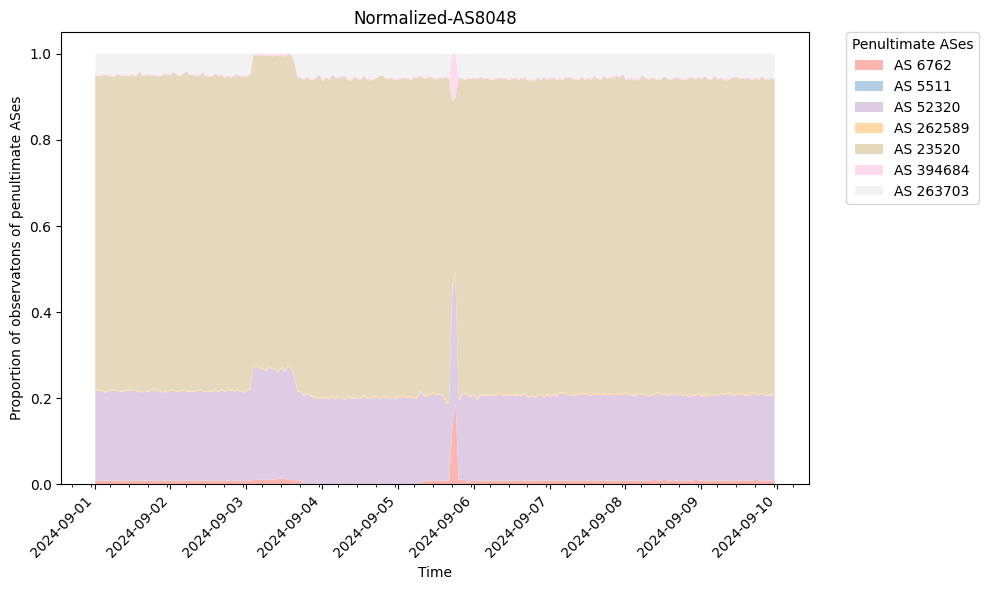

In [71]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def process_file(file_path, as_numbers, originAS=8405):
    """Process each JSON file with multiple JSON objects (one per line).
       Count occurrences of the last AS number before the origin AS in the AS path, if the origin AS is 8405."""
    result = defaultdict(int)
    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    entry = json.loads(line)
                    if 'as_path' in entry and len(entry['as_path']) >= 2:
                        as_path = entry['as_path']
                        # Find the last occurrence of the origin AS and check the AS number before it
                        if originAS in as_path:
                            # Get the index of the last occurrence of the origin AS
                            origin_index = len(as_path) - 1 - as_path[::-1].index(originAS)
                            if origin_index > 0:  # Ensure there is an AS number before the origin AS
                                last_as_before_origin = as_path[origin_index - 1]
                                # Check if this AS number is in as_numbers
                                if last_as_before_origin in as_numbers:
                                    result[last_as_before_origin] += 1
                        else:
                            if as_path[-1] in as_numbers:
                                result[as_path[-1]] += 1
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
    return result

def aggregate_data(base_path, as_numbers, target):
    """Aggregate data from all directories under the base path for the specified AS numbers."""
    data = {}
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(f'{target}.json'):
                    file_path = os.path.join(folder_path, filename)
                    result = process_file(file_path, as_numbers, target)
                    if folder_name in data:
                        for key in result:
                            data[folder_name][key] += result[key]
                    else:
                        data[folder_name] = result
    return data


def plot_data(data, as_numbers, target):
    """Plot a normalized stacked area chart from aggregated data for specified AS numbers."""
    # Sort the timestamps and convert them to datetime objects
    timestamps = sorted(data.keys(), key=lambda x: datetime.strptime(f"2024-{x}", "%Y-%B-%d-%H-%M"))
    datetime_objects = [datetime.strptime(f"2024-{time}", "%Y-%B-%d-%H-%M") for time in timestamps]

    # Calculate total counts for each timestamp to normalize data
    total_counts = [sum(data[time].values()) for time in timestamps]

    # Extract individual AS counts and normalize them
    normalized_data = {as_num: [data[time].get(as_num, 0) / total if total > 0 else 0 for time, total in zip(timestamps, total_counts)] for as_num in as_numbers}

    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = plt.get_cmap('Pastel1')  # Using a pastel color map
    colors = cmap(np.linspace(0, 1, len(as_numbers)))  # Generate colors for each AS number

    # Prepare data for stackplot
    stack_data = [normalized_data[as_num] for as_num in as_numbers]
    labels = [f'AS {as_num}' for as_num in as_numbers]

    # Plot the stackplot
    ax.stackplot(datetime_objects, *stack_data, labels=labels, colors=colors)

    # Set the x-axis date formatting
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax.set_xlabel('Time')
    ax.set_ylabel('Proportion of observatons of penultimate ASes')
    ax.set_title(f'Normalized-AS{target}')
    ax.legend(title='Penultimate ASes', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# List of AS numbers to track
as_numbers = ["6762", "5511", "52320", "262589", "23520", "394684", "263703"]

# Main execution
if __name__ == "__main__":
    base_path = "../result/vene" 
    target = "8048"
    aggregated_data = aggregate_data(base_path, as_numbers, target)

    plot_data(aggregated_data, as_numbers, target)

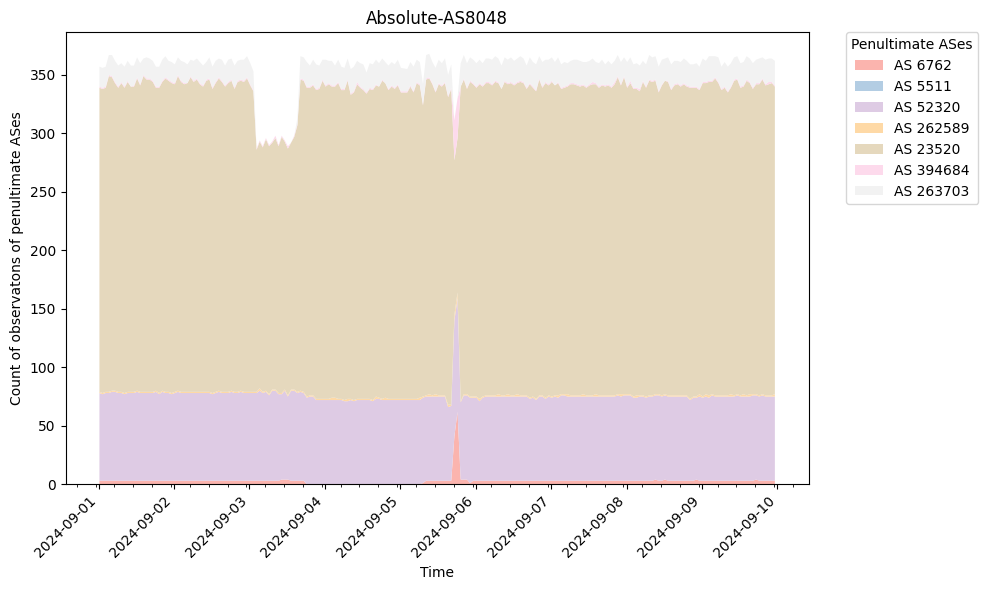

In [72]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def process_file(file_path, as_numbers, originAS=8405):
    """Process each JSON file with multiple JSON objects (one per line).
       Count occurrences of the last AS number before the origin AS in the AS path, if the origin AS is 8405."""
    result = defaultdict(int)
    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    entry = json.loads(line)
                    if 'as_path' in entry and len(entry['as_path']) >= 2:
                        as_path = entry['as_path']
                        # Find the last occurrence of the origin AS and check the AS number before it
                        if originAS in as_path:
                            # Get the index of the last occurrence of the origin AS
                            origin_index = len(as_path) - 1 - as_path[::-1].index(originAS)
                            if origin_index > 0:  # Ensure there is an AS number before the origin AS
                                last_as_before_origin = as_path[origin_index - 1]
                                # Check if this AS number is in as_numbers
                                if last_as_before_origin in as_numbers:
                                    result[last_as_before_origin] += 1
                        else:
                            if as_path[-1] in as_numbers:
                                result[as_path[-1]] += 1
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
    return result

def aggregate_data(base_path, as_numbers, target):
    """Aggregate data from all directories under the base path for the specified AS numbers."""
    data = {}
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(f'{target}.json'):
                    file_path = os.path.join(folder_path, filename)
                    result = process_file(file_path, as_numbers, target)
                    if folder_name in data:
                        for key in result:
                            data[folder_name][key] += result[key]
                    else:
                        data[folder_name] = result
    return data


def plot_data(data, as_numbers, target):
    """Plot a stacked area chart from aggregated data for specified AS numbers using absolute values."""
    # Sort the timestamps and convert them to datetime objects
    timestamps = sorted(data.keys(), key=lambda x: datetime.strptime(f"2024-{x}", "%Y-%B-%d-%H-%M"))
    datetime_objects = [datetime.strptime(f"2024-{time}", "%Y-%B-%d-%H-%M") for time in timestamps]

    # Extract individual AS counts for absolute values
    absolute_data = {as_num: [data[time].get(as_num, 0) for time in timestamps] for as_num in as_numbers}

    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = plt.get_cmap('Pastel1')  # Using a pastel color map
    colors = cmap(np.linspace(0, 1, len(as_numbers)))  # Generate colors for each AS number

    # Prepare data for stackplot using absolute values
    stack_data = [absolute_data[as_num] for as_num in as_numbers]
    labels = [f'AS {as_num}' for as_num in as_numbers]

    # Plot the stackplot
    ax.stackplot(datetime_objects, *stack_data, labels=labels, colors=colors)

    # Set the x-axis date formatting
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax.set_xlabel('Time')
    ax.set_ylabel('Count of observatons of penultimate ASes')
    ax.set_title(f'Absolute-AS{target}')
    ax.legend(title='Penultimate ASes', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# List of AS numbers to track
as_numbers = ["6762", "5511", "52320", "262589", "23520", "394684", "263703"]

# Main execution
if __name__ == "__main__":
    base_path = "../result/vene" 
    target = "8048"
    aggregated_data = aggregate_data(base_path, as_numbers, target)

    plot_data(aggregated_data, as_numbers, target)

In [65]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def process_file(file_path, as_numbers):
    """Process each JSON file with multiple JSON objects (one per line)."""
    print(file_path)
    
    result = defaultdict(int)
    prefix_set = set()
    try:
        
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    entry = json.loads(line)
                    if 'as_path' in entry:
                        as_path = set(entry['as_path'])
                        for as_num in as_numbers:
                            if as_num in as_path:
                                result[as_num] += 1
                                prefix_set.add(entry["dest"]["ip"])
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

    print(len(prefix_set))
    return prefix_set


# List of AS numbers to track
as_numbers = ["6762", "5511", "52320", "262589", "23520", "394684", "263703"]

# Main execution
if __name__ == "__main__":
    base_path = "../result/vene" 
    target = 8048
    dates = {}
    for folder_name in os.listdir(base_path):
        if folder_name not in ["September-01-00-14", "September-03-08-15", "September-05-17-13", "September-09-18-15"]:
            continue
            
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(f'{target}.json'):
                    file_path = os.path.join(folder_path, filename)
                    dates[folder_name] = process_file(file_path, as_numbers)

print(len(dates["September-01-00-14"] - dates["September-03-08-15"]))
print(len(dates["September-09-18-15"] - dates["September-03-08-15"]))
print(len(dates["September-01-00-14"] - dates["September-05-17-13"]))
print(len(dates["September-09-18-15"] - dates["September-05-17-13"]))



diff = dates["September-01-00-14"] - dates["September-03-08-15"]

diff_exist_count = 0
paths = defaultdict(list)
with open("../result/vene/September-01-00-14/8048.json", 'r') as file:
    for line in file:
        try:
            entry = json.loads(line)
            if entry["dest"]["ip"] in diff:
                paths[entry["dest"]["ip"]].append(entry['as_path'])
        except:
            pass


with open("../result/vene/September-03-08-15/8048.json", 'r') as file:
    for line in file:
        try:
            entry = json.loads(line)
            if entry["dest"]["ip"] in diff:
                paths[entry["dest"]["ip"]].append(entry['as_path'])
        except:
            pass

for prefix in paths:
    print(prefix)
    print(paths[prefix])



../result/vene/September-09-18-15/8048.json
373
../result/vene/September-01-00-14/8048.json
365
../result/vene/September-05-17-13/8048.json
312
../result/vene/September-03-08-15/8048.json
298
70
75
61
65
201.249.130.1
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520'], ['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491']]
186.90.240.125
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520'], ['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491']]
190.75.122.65
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '23520'], ['2637', '2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491']]
190.75.0.1
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520'], ['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491',

for event 1, where do the white go?

In [66]:

import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def process_file(file_path, as_numbers):
    """Process each JSON file with multiple JSON objects (one per line)."""
    print(file_path)
    
    result = defaultdict(int)
    prefix_set = set()
    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    entry = json.loads(line)
                    if 'as_path' in entry:
                        as_path = set(entry['as_path'])
                        as_num = "263703"
                        if as_num in as_path:
                            result[as_num] += 1
                            prefix_set.add(entry["dest"]["ip"])
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

    print(len(prefix_set))
    return prefix_set


# List of AS numbers to track
as_numbers = ["6762", "5511", "52320", "262589", "23520", "394684", "263703"]

# Main execution
if __name__ == "__main__":
    base_path = "../result/vene" 
    target = 8048
    dates = {}
    for folder_name in os.listdir(base_path):
        if folder_name not in ["September-01-00-14", "September-03-08-15", "September-05-17-13", "September-09-18-15"]:
            continue
            
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(f'{target}.json'):
                    file_path = os.path.join(folder_path, filename)
                    dates[folder_name] = process_file(file_path, as_numbers)

print(len(dates["September-01-00-14"] - dates["September-03-08-15"]))
print(len(dates["September-09-18-15"] - dates["September-03-08-15"]))
print(len(dates["September-01-00-14"] - dates["September-05-17-13"]))
print(len(dates["September-09-18-15"] - dates["September-05-17-13"]))

# dates["September-01-00-14"] contains all prefixes taht colored white, need to print the new AS path during events
diff = dates["September-01-00-14"]
paths = defaultdict(list)
with open("../result/vene/September-01-00-14/8048.json", 'r') as file:
    for line in file:
        try:
            entry = json.loads(line)
            if entry["dest"]["ip"] in diff:
                paths[entry["dest"]["ip"]].append(entry['as_path'])
        except:
            pass


with open("../result/vene/September-03-08-15/8048.json", 'r') as file:
    for line in file:
        try:
            entry = json.loads(line)
            if entry["dest"]["ip"] in diff:
                paths[entry["dest"]["ip"]].append(entry['as_path'])
        except:
            pass

for prefix in paths:
    print(prefix)
    print(paths[prefix])



../result/vene/September-09-18-15/8048.json
21
../result/vene/September-01-00-14/8048.json
17
../result/vene/September-05-17-13/8048.json
0
../result/vene/September-03-08-15/8048.json
0
17
21
17
21
190.202.152.228
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '3491', '23520', '23520', '23520', '263703'], ['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '3491', '23520', '23520']]
190.202.247.215
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '3491', '23520', '23520', '263703'], ['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '3491', '23520', '23520']]
190.198.224.1
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520', '23520', '23520', '263703', '263703'], ['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520', '23520']]
190.72.103.89
[['2637

what is pink and red?

In [76]:

import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def process_file(file_path, target_as):
    """Process each JSON file with multiple JSON objects (one per line)."""
    print(file_path)
    
    result = defaultdict(int)
    prefix_set = set()
    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    entry = json.loads(line)
                    if 'as_path' in entry:
                        as_path = set(entry['as_path'])
                        as_num = target_as
                        if as_num in as_path:
                            result[as_num] += 1
                            prefix_set.add(entry["dest"]["ip"])
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

    print(len(prefix_set))
    return prefix_set


# List of AS numbers to track
as_numbers = ["6762", "5511", "52320", "262589", "23520", "394684", "263703"]

# Main execution
if __name__ == "__main__":
    base_path = "../result/vene" 
    target = 8048
    dates = {}
    for folder_name in os.listdir(base_path):
        if folder_name not in ["September-01-00-14", "September-03-08-15", "September-05-17-13", "September-09-18-15"]:
            continue
            
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(f'{target}.json'):
                    file_path = os.path.join(folder_path, filename)
                    dates[folder_name] = process_file(file_path, "23520")

print(len(dates["September-01-00-14"] - dates["September-03-08-15"]))
print(len(dates["September-09-18-15"] - dates["September-03-08-15"]))
print(len(dates["September-01-00-14"] - dates["September-05-17-13"]))
print(len(dates["September-09-18-15"] - dates["September-05-17-13"]))

# dates["September-01-00-14"] contains all prefixes taht colored white, need to print the new AS path during events
diff = dates["September-01-00-14"]
paths = defaultdict(list)
with open("../result/vene/September-01-00-14/8048.json", 'r') as file:
    for line in file:
        try:
            entry = json.loads(line)
            if entry["dest"]["ip"] in diff:
                paths[entry["dest"]["ip"]].append(entry['as_path'])
        except:
            pass


with open("../result/vene/September-05-17-13/8048.json", 'r') as file:
    for line in file:
        try:
            entry = json.loads(line)
            if entry["dest"]["ip"] in diff:
                paths[entry["dest"]["ip"]].append(entry['as_path'])
        except:
            pass

for prefix in paths:
    print(prefix)
    print(paths[prefix])



../result/vene/September-09-18-15/8048.json
294
../result/vene/September-01-00-14/8048.json
283
../result/vene/September-05-17-13/8048.json
132
../result/vene/September-03-08-15/8048.json
216
70
78
160
166
186.95.127.127
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520', '23520'], ['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520', '23520']]
186.90.193.197
[['1299', '1299', '1299', '23520', '23520', '23520'], ['1299', '1299', '1299', '23520', '23520']]
201.249.130.1
[['2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520'], ['2637', '11537', '11537', '6461', '52320']]
200.90.53.25
[['2637', '2637', '11537', '11537', '11537', '11537', '11537', '11537', '11537', '3491', '3491', '23520'], ['174', '174', '174', '174', '1239', '394684']]
200.11.208.1
[['1299', '1299', '1299', '1299', '23520', '23520', '23520', '23520'], ['1299', '1299', '1299', '1299', '23520',

In [63]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def process_file(file_path, as_numbers):
    """Process each JSON file with multiple JSON objects (one per line)."""
    result = defaultdict(int)
    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    entry = json.loads(line)
                    if 'as_path' in entry:
                        as_path = set(entry['as_path'])
                        for as_num in as_numbers:
                            if as_num in as_path:
                                result[as_num] += 1
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
    return result

def aggregate_data(base_path, as_numbers, target):
    """Aggregate data from all directories under the base path for the specified AS numbers."""
    data = {}
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(f'{target}.json'):
                    file_path = os.path.join(folder_path, filename)
                    result = process_file(file_path, as_numbers)
                    if folder_name in data:
                        for key in result:
                            data[folder_name][key] += result[key]
                    else:
                        data[folder_name] = result
    return data



# List of AS numbers to track
as_numbers = ["6762", "5511", "52320", "262589", "23520", "394684", "263703"]

# Main execution
if __name__ == "__main__":
    base_path = "../result/vene" 
    target = 8048
    aggregated_data = aggregate_data(base_path, as_numbers, target)
    alltime = []
    for time in aggregated_data:
        if aggregated_data[time]["23520"] < 275:
            print(time)
            alltime.append(time)
    print(sorted(alltime))

September-03-15-15
September-03-11-13
September-03-05-14
September-03-04-13
September-03-10-15
September-03-14-14
September-03-07-14
September-03-03-15
September-03-13-14
September-05-17-13
September-03-12-13
September-03-06-14
September-03-02-15
September-03-09-15
September-05-18-13
September-03-08-15
['September-03-02-15', 'September-03-03-15', 'September-03-04-13', 'September-03-05-14', 'September-03-06-14', 'September-03-07-14', 'September-03-08-15', 'September-03-09-15', 'September-03-10-15', 'September-03-11-13', 'September-03-12-13', 'September-03-13-14', 'September-03-14-14', 'September-03-15-15', 'September-05-17-13', 'September-05-18-13']
